# Chest cancer detection using deep leaning

### Overview

In recent years, deep learning has emerged as a powerful tool in the medical field, particularly in the prediction and detection of cancer. Leveraging advanced neural network architectures, deep learning models can analyze medical images, genomic data, and other medical information to identify early-stage cancer, predict patient outcomes, and personalize treatment plans. This transformative technology holds immense promise for improving cancer diagnostics, prognosis, and treatment selection. This project delves into harnessing the potential of deep learning in cancer prediction, aiming to contribute to enhanced patient care and outcomes in the realm of oncology.

### Key Skills and Technologies

This project involves the following key skills and technologies:

- Python
- TensorFlow
- Keras
- Deep Learning
- Image Processing
- Convolutional Neural Networks (CNNs)
- VGG16 Pretrained Model
- Data Augmentation
- EarlyStopping Callback
- ReduceLROnPlateau Callback
- OpenCV
- Matplotlib
- Pandas
- Numpy

### Results

- Training Accuracy: 80.27%   
- Validation Accuracy: 76.67%  
- Test Accuracy: 56.25%   

## Loading Data

In [ ]:
!ls /content

kaggle.json  sample_data


In [ ]:
!chmod 777 /content/kaggle.json

In [ ]:
!mkdir /root/.kaggle  #.file is hidden

In [ ]:
!ls /root

In [ ]:
!mv /content/kaggle.json /root/.kaggle

In [ ]:
!ls /content

sample_data


**About the data**

Dataset: Chest CT-Scan images Dataset

Dataset contain 3 chest cancer types which are Adenocarcinoma, Large cell carcinoma, Squamous cell carcinoma , and 1 folder for the normal cell

- Adenocarcinoma
Lung adenocarcinoma stands as the most prevalent type of lung cancer, comprising approximately 30 percent of all lung cancer cases and around 40 percent of non-small cell lung cancer diagnoses. Such cancers are found in the lung's outer regions, particularly within glands responsible for mucus secretion and respiratory support. Symptoms include coughing, hoarseness, weight loss and weakness.

- Large cell carcinoma
Large-cell undifferentiated carcinoma of the lung is an aggressive form of lung cancer characterized by rapid growth and the potential to appear anywhere within the lung. Typically, this subtype constitutes approximately 10 to 15 percent of all cases of non-small cell lung cancer (NSCLC). Large-cell undifferentiated carcinoma is known for its swift progression, both in terms of tumor growth and the tendency to spread to other parts of the body.

- Squamous cell carcinoma
Squamous cell lung cancer typically originates in central areas of the lung, specifically where the larger bronchi connect to the trachea or within the main airway branches. Among non-small cell lung cancers (NSCLC), squamous cell lung cancer accounts for approximately 30 percent of cases and is commonly associated with smoking.

And the last folder is the normal CT-Scan images

In [ ]:
#!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 98% 116M/119M [00:00<00:00, 184MB/s] 
100% 119M/119M [00:00<00:00, 172MB/s]


In [ ]:
!ls /content

chest-ctscan-images.zip  sample_data


In [ ]:
!unzip /content/chest-ctscan-images.zip -d /tmp

Archive:  /content/chest-ctscan-images.zip
  inflating: /tmp/Data/test/adenocarcinoma/000108 (3).png  
  inflating: /tmp/Data/test/adenocarcinoma/000109 (2).png  
  inflating: /tmp/Data/test/adenocarcinoma/000109 (4).png  
  inflating: /tmp/Data/test/adenocarcinoma/000109 (5).png  
  inflating: /tmp/Data/test/adenocarcinoma/000112 (2).png  
  inflating: /tmp/Data/test/adenocarcinoma/000113 (7).png  
  inflating: /tmp/Data/test/adenocarcinoma/000114 (5).png  
  inflating: /tmp/Data/test/adenocarcinoma/000114.png  
  inflating: /tmp/Data/test/adenocarcinoma/000115 (4).png  
  inflating: /tmp/Data/test/adenocarcinoma/000115 (8).png  
  inflating: /tmp/Data/test/adenocarcinoma/000115.png  
  inflating: /tmp/Data/test/adenocarcinoma/000116 (5).png  
  inflating: /tmp/Data/test/adenocarcinoma/000116 (7).png  
  inflating: /tmp/Data/test/adenocarcinoma/000116 (9).png  
  inflating: /tmp/Data/test/adenocarcinoma/000117 (4).png  
  inflating: /tmp/Data/test/adenocarcinoma/000117 (8).png  
  inf

Folder structure:

proj/medical_imgs
- train - 4 categories
- validation - 4 categories
- test - 4 categories




In [ ]:
!mkdir /proj

In [ ]:
!mkdir /proj/medical_imgs

In [ ]:
!mkdir /proj/medical_imgs/train
!mkdir /proj/medical_imgs/validation
!mkdir /proj/medical_imgs/test

In [ ]:
!mkdir /proj/medical_imgs/train/adenocarcinoma
!mkdir /proj/medical_imgs/train/large.cell.carcinoma
!mkdir /proj/medical_imgs/train/normal
!mkdir /proj/medical_imgs/train/squamous.cell.carcinoma

In [ ]:
!mkdir /proj/medical_imgs/validation/adenocarcinoma
!mkdir /proj/medical_imgs/validation/large.cell.carcinoma
!mkdir /proj/medical_imgs/validation/normal
!mkdir /proj/medical_imgs/validation/squamous.cell.carcinoma

In [ ]:
!mkdir /proj/medical_imgs/test/adenocarcinoma
!mkdir /proj/medical_imgs/test/large.cell.carcinoma
!mkdir /proj/medical_imgs/test/normal
!mkdir /proj/medical_imgs/test/squamous.cell.carcinoma

Loading data in repective folders

In [ ]:
!mv /tmp/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/*.png /proj/medical_imgs/train/adenocarcinoma
!mv /tmp/Data/test/adenocarcinoma/*.png /proj/medical_imgs/train/adenocarcinoma

In [ ]:
!mv /tmp/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/*.png /proj/medical_imgs/train/large.cell.carcinoma
!mv /tmp/Data/test/large.cell.carcinoma/*.png /proj/medical_imgs/train/large.cell.carcinoma

In [ ]:
!mv /tmp/Data/train/normal/*.png /proj/medical_imgs/train/normal
!mv /tmp/Data/test/normal/*.png /proj/medical_imgs/train/normal

In [ ]:
!mv /tmp/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/*.png /proj/medical_imgs/train/squamous.cell.carcinoma
!mv /tmp/Data/test/squamous.cell.carcinoma/*.png /proj/medical_imgs/train/squamous.cell.carcinoma

In [ ]:
!mv /tmp/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/*.png /proj/medical_imgs/validation/adenocarcinoma
!mv /tmp/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/*.png /proj/medical_imgs/validation/large.cell.carcinoma
!mv /tmp/Data/valid/normal/*.png /proj/medical_imgs/validation/normal
!mv /tmp/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/*.png /proj/medical_imgs/validation/squamous.cell.carcinoma

Allocating 4 random pics from each category into testing folders

In [ ]:
!mv /proj/medical_imgs/train/adenocarcinoma/ad2.png /proj/medical_imgs/test/adenocarcinoma
!mv /proj/medical_imgs/train/adenocarcinoma/ad3.png /proj/medical_imgs/test/adenocarcinoma
!mv /proj/medical_imgs/train/adenocarcinoma/ad22.png /proj/medical_imgs/test/adenocarcinoma
!mv /proj/medical_imgs/train/adenocarcinoma/ad5.png /proj/medical_imgs/test/adenocarcinoma

In [ ]:
!mv /proj/medical_imgs/train/large.cell.carcinoma/l1.png /proj/medical_imgs/test/large.cell.carcinoma
!mv /proj/medical_imgs/train/large.cell.carcinoma/l2.png /proj/medical_imgs/test/large.cell.carcinoma
!mv /proj/medical_imgs/train/large.cell.carcinoma/l5.png /proj/medical_imgs/test/large.cell.carcinoma
!mv /proj/medical_imgs/train/large.cell.carcinoma/l6.png /proj/medical_imgs/test/large.cell.carcinoma

In [ ]:
!mv /proj/medical_imgs/train/normal/8.png /proj/medical_imgs/test/normal
!mv /proj/medical_imgs/train/normal/20.png /proj/medical_imgs/test/normal
!mv /proj/medical_imgs/train/normal/16.png /proj/medical_imgs/test/normal
!mv /proj/medical_imgs/train/normal/5.png /proj/medical_imgs/test/normal

In [ ]:
!mv /proj/medical_imgs/train/squamous.cell.carcinoma/sq5.png /proj/medical_imgs/test/squamous.cell.carcinoma
!mv /proj/medical_imgs/train/squamous.cell.carcinoma/sq2.png /proj/medical_imgs/test/squamous.cell.carcinoma
!mv /proj/medical_imgs/train/squamous.cell.carcinoma/sq4.png /proj/medical_imgs/test/squamous.cell.carcinoma
!mv /proj/medical_imgs/train/squamous.cell.carcinoma/sq6.png /proj/medical_imgs/test/squamous.cell.carcinoma

The OS module in Python provides functions for creating directories

In [ ]:
import os
base_dir = '/proj/medical_imgs/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
!ls /proj/medical_imgs/train

adenocarcinoma	large.cell.carcinoma  normal  squamous.cell.carcinoma


In [ ]:
train_adenocarcinoma_dir = os.path.join(train_dir, 'adenocarcinoma')
train_large_cell_carcinoma_dir = os.path.join(train_dir, 'large.cell.carcinoma')
train_normal_dir = os.path.join(train_dir, 'normal')
train_squamous_cell_carcinoma_dir = os.path.join(train_dir, 'squamous.cell.carcinoma')

validation_adenocarcinoma_dir = os.path.join(validation_dir, 'adenocarcinoma')
validation_large_cell_carcinoma_dir = os.path.join(validation_dir, 'large.cell.carcinoma')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_squamous_cell_carcinoma_dir = os.path.join(validation_dir, 'squamous.cell.carcinoma')

In [ ]:
test_adenocarcinoma_dir = os.path.join(test_dir, 'adenocarcinoma')
test_large_cell_carcinoma_dir = os.path.join(test_dir, 'large.cell.carcinoma')
test_normal_dir = os.path.join(test_dir, 'normal')
test_squamous_cell_carcinoma_dir = os.path.join(test_dir, 'squamous.cell.carcinoma')

In [ ]:
!ls /proj/medical_imgs/test/

adenocarcinoma	large.cell.carcinoma  normal  squamous.cell.carcinoma


In [ ]:
num_adenocarcinoma_tr = len(os.listdir(train_adenocarcinoma_dir))
num_large_cell_carcinoma_tr = len(os.listdir(train_large_cell_carcinoma_dir))
num_normal_tr = len(os.listdir(train_normal_dir))
num_squamous_cell_carcinoma_tr = len(os.listdir(train_squamous_cell_carcinoma_dir))

In [ ]:
num_adenocarcinoma_val = len(os.listdir(validation_adenocarcinoma_dir))
num_large_cell_carcinoma_val = len(os.listdir(validation_large_cell_carcinoma_dir))
num_normal_val = len(os.listdir(validation_normal_dir))
num_squamous_cell_carcinoma_val = len(os.listdir(validation_squamous_cell_carcinoma_dir))

In [ ]:
num_adenocarcinoma_test = len(os.listdir(test_adenocarcinoma_dir))
num_large_cell_carcinoma_test = len(os.listdir(test_large_cell_carcinoma_dir))
num_normal_test = len(os.listdir(test_normal_dir))
num_squamous_cell_carcinoma_test = len(os.listdir(test_squamous_cell_carcinoma_dir))

In [ ]:
total_train = num_adenocarcinoma_tr+num_large_cell_carcinoma_tr+num_normal_tr+num_squamous_cell_carcinoma_tr
total_val = num_adenocarcinoma_val + num_large_cell_carcinoma_val+num_normal_val+num_squamous_cell_carcinoma_val
total_test = num_adenocarcinoma_test + num_large_cell_carcinoma_test +num_normal_test +num_squamous_cell_carcinoma_test

In [58]:
print('Total training images:', total_train)
print('Total validation images:', total_val)
print('Total Training images:', total_test)

Total training images: 836
Total validation images: 72
Total Training images: 16


Insufficient data can lead to poor model performance, using a pre-trained model can help improve performance.

This method of reuseing a pre-trained model on a new problem is called Transfer Learning.

## Model Building

In [ ]:
#import libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

The ImageNet dataset contains images of fixed size of 224*224 and have RGB channels. So, we have a tensor of (224, 224, 3) as input.

In [ ]:
# Image size (Vgg 16 default input size)
img_width, img_height = 224, 224

# Batch size for training and validation
batch_size = 15

VGG16
- VGG16 is a convolution neural net architecture that's used for image recognition.
- This model achieves 92.7% top-5 test accuracy on the ImageNet dataset which contains 14 million images belonging to 1000 classes.

In [ ]:
#include_top = False doesnt take the NN layers
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in base_model.layers])
layer_dict

{'input_1': <keras.engine.input_layer.InputLayer at 0x7955a4feb490>,
 'block1_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a4feb700>,
 'block1_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a4634580>,
 'block1_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7955a46356c0>,
 'block2_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a4636320>,
 'block2_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a4637040>,
 'block2_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7955a4637e80>,
 'block3_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a46374f0>,
 'block3_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a46c9030>,
 'block3_conv3': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a46ca050>,
 'block3_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7955a46c92d0>,
 'block4_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7955a46cb310>,
 'block4_conv2': <keras.layers.convolutional

In [ ]:
print('No. of layers: ',len(layer_dict))

No. of layers:  19


In [ ]:
last_layer = list(layer_dict.keys())[-1] #last layer

In [ ]:
last_layer

'block5_pool'

In [ ]:
# Freeze the first 14 layers
for layer in base_model.layers[:14]:
    layer.trainable = False

In [171]:
# Custom layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

#Getting output tensor of the last VGG layer that we want to include
x = layer_dict[last_layer].output #targeting last layer

#stacking a new simple convolution layer on top of it

x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')(x)
x = (BatchNormalization())(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.25)(x)

x = Dense(4, activation = 'softmax')(x)


In [172]:
from keras.models import Model
model = Model(base_model.input, x)

In [173]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [174]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

**Defining Callback list**

EarlyStopping is called to stop the epochs based on some metric(monitor) and conditions (mode, patience) . It helps to avoid overfitting the model.

ReduceLROnPlateau is a scheduling technique that decreases the learning rate when the specified metric stops improving for longer than the patience number allows.

In [175]:
#callbacks

from keras.callbacks import EarlyStopping, ReduceLROnPlateau


#learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00002)

earlystop = EarlyStopping(patience = 25)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00001)

callbacks = [earlystop, learning_rate_reduction]

**Data Augmentation**
- Expands the size of the dataset by creating a modified version of the existing training set images.
- Helps to increase dataset variation.
- Ultimately improves the ability of the model to predict new images.

In [176]:

image_gen_train = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=25,
                                     width_shift_range = 0.2,
                                     height_shift_range=0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (img_width, img_height),
                                               class_mode = 'categorical')

Found 836 images belonging to 4 classes.


For the Test & Validation set, only rescale to avoid manipulating the test data beforehand.

In [177]:
#No augmentation on validation data

image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size,
                                               directory = validation_dir,
                                               shuffle = True,
                                               target_size = (img_width, img_height),
                                               class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [178]:
image_gen_test = ImageDataGenerator(rescale=1. / 255)

test_data_gen = image_gen_test.flow_from_directory(directory = test_dir,
                                                batch_size=batch_size,
                                                class_mode ='categorical',
                                                shuffle = True,
                                                target_size=(img_width, img_height))

Found 16 images belonging to 4 classes.


In [179]:
#model training

history = model.fit(train_data_gen,
                              epochs = 25,
                              validation_data = val_data_gen,
                              validation_steps = total_val//batch_size,
                              steps_per_epoch = total_train//batch_size,
                              callbacks=callbacks)

Epoch 1/25
55/55 [==============================] - 19s 271ms/step - loss: 1.1159 - accuracy: 0.4750 - val_loss: 19.4397 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/25
55/55 [==============================] - 14s 263ms/step - loss: 0.9278 - accuracy: 0.6005 - val_loss: 3.9790 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 3/25
55/55 [==============================] - 15s 263ms/step - loss: 0.8470 - accuracy: 0.6285 - val_loss: 1.5196 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/25
55/55 [==============================] - 14s 261ms/step - loss: 0.7677 - accuracy: 0.6443 - val_loss: 3.0043 - val_accuracy: 0.3833 - lr: 0.0010
Epoch 5/25
55/55 [==============================] - 14s 259ms/step - loss: 0.7293 - accuracy: 0.6991 - val_loss: 0.8834 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 6/25
55/55 [==============================] - 14s 262ms/step - loss: 0.7894 - accuracy: 0.6675 - val_loss: 0.8476 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 7/25
55/55 [==============================] - ETA: 0s - l

## Evaluation

Accuracy: 0.8027  
Validation Accuracy: 0.7667

In [180]:
# Assuming 'history' is the result of model.fit()

# Access the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access the training and validation accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

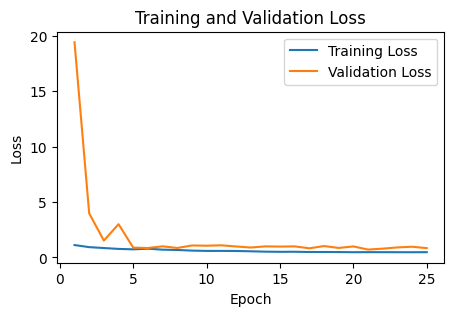

In [181]:
# Plot loss
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

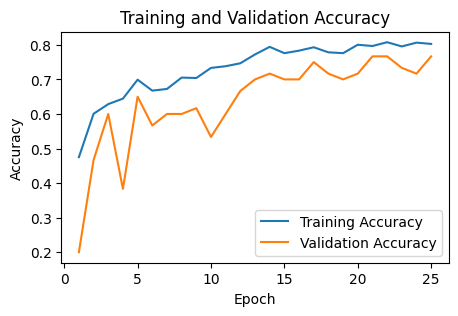

In [182]:
# Plot accuracy
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [183]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_gen)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

2/2 [==============================] - 0s 21ms/step - loss: 2.7843 - accuracy: 0.5625
Test Loss: 2.7843
Test Accuracy: 0.5625


Test Accuracy: 0.5625

1/1 [==============================] - 0s 50ms/step


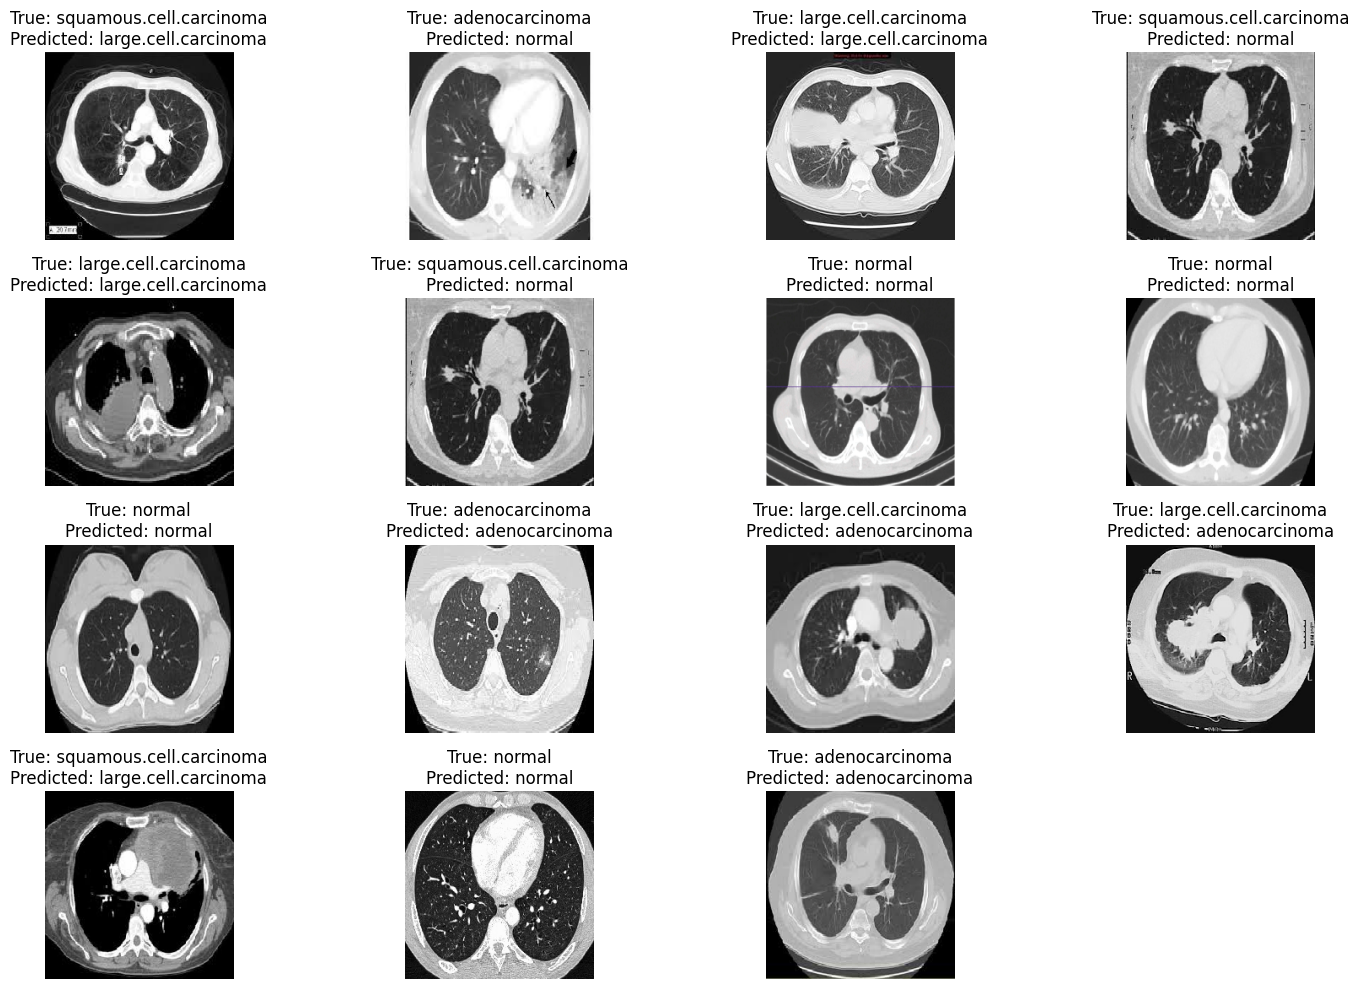

In [184]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import os

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x


# Get the class labels
class_labels = train_data_gen.class_indices

# Predict and show images with predictions
plt.figure(figsize=(15, 10))

# Get a batch of images and labels from the test data generator
batch = test_data_gen.next()
images, labels = batch

# Make predictions for each image in the batch
for i in range(len(images)):
    image_array = images[i]
    label = labels[i]
    true_label = list(class_labels.keys())[list(class_labels.values()).index(np.argmax(label))]

    # Make prediction for the image
    preds = model.predict(np.expand_dims(image_array, axis=0))
    predicted_label = list(class_labels.keys())[list(class_labels.values()).index(np.argmax(preds))]

    # Load the image in BGR format using OpenCV (since imread() reads in BGR format)
    img_bgr = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

    # Convert BGR to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Plot the image with the true label and predicted label
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_rgb)
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [185]:
#save model
model.save('/content/medical.h5')